## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.preprocessing  import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# model imports
# logistic regression
from sklearn.linear_model import LogisticRegression
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machines
from sklearn.svm import SVC
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# K-Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Gradient Boost
# Ada Boost
from sklearn.tree import DecisionTreeClassifier # requirement for ada gradient boost
from sklearn.ensemble import AdaBoostClassifier
print('imports done')

imports done


## Load Data

In [2]:
train_raw_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
print('data loaded')

data loaded


In [3]:
# split the data
train_data, val_data = train_test_split(train_raw_data, test_size=0.3, random_state=42)
print('data splitted')

data splitted


In [4]:
# extract the labels
train_labels = train_data.pop('Survived')
val_labels = val_data.pop('Survived')
print('train_labels shape', str(train_labels.shape))
print('val_labels shape', str(val_labels.shape))

train_labels shape (623,)
val_labels shape (268,)


In [5]:
passengerId = test_data['PassengerId']
train_data = train_data.drop(columns=['PassengerId'])
val_data = val_data.drop(columns=['PassengerId'])
test_data = test_data.drop(columns=['PassengerId'])
print('passengerId copied and removed')

passengerId copied and removed


## Missing Values

### Categorical Values

Removing Cabin since it has `77.7%` of missing values

In [6]:
# Removing unneessary categorical values
train_data = train_data.drop(columns=['Cabin', 'Ticket'])
val_data = val_data.drop(columns=['Cabin', 'Ticket'])
test_data = test_data.drop(columns=['Cabin', 'Ticket'])
print('removed features from categorical features')

removed features from categorical features


Find the mode in `Emabrked` and imput with it

In [7]:
# train
embarked_mode_train = train_data['Embarked'].mode()
embarked_mask_train = train_data['Embarked'].isna()
train_data.loc[embarked_mask_train] = train_data.loc[embarked_mask_train].fillna(str(embarked_mode_train))
print('Embarked nans in train_data', train_data['Embarked'].isna().sum())

# val
embarked_mode_val = val_data['Embarked'].mode()
embarked_mask_val = val_data['Embarked'].isna()
val_data.loc[embarked_mask_val] = val_data.loc[embarked_mask_val].fillna(str(embarked_mode_val))
print('Embarked nans in val_data', val_data['Embarked'].isna().sum())

# test 
embarked_mode_test = test_data['Embarked'].mode()
embarked_mask_test = test_data['Embarked'].isna()
test_data.loc[embarked_mask_test] = test_data.loc[embarked_mask_test].fillna(str(embarked_mode_test))
print('Embarked nans in test_data', test_data['Embarked'].isna().sum())

train_data.select_dtypes(include=('object')).info()
val_data.select_dtypes(include=('object')).info()
test_data.select_dtypes(include=('object')).info()

Embarked nans in train_data 0
Embarked nans in val_data 0
Embarked nans in test_data 0
<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      623 non-null    object
 1   Sex       623 non-null    object
 2   Embarked  623 non-null    object
dtypes: object(3)
memory usage: 19.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 709 to 430
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      268 non-null    object
 1   Sex       268 non-null    object
 2   Embarked  268 non-null    object
dtypes: object(3)
memory usage: 8.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      418 non-null    object
 1   Sex       418 non-null    o

### Numerical Values

`Age` is the only feature with missing values

In [8]:
# train
age_mean_train = train_data['Age'].mean()
age_mask_train = train_data['Age'].isna()
train_data.loc[age_mask_train] = train_data.loc[age_mask_train].fillna(age_mean_train)

# validation
age_mean_val = train_data['Age'].mean()
age_mask_val = val_data['Age'].isna()
val_data.loc[age_mask_val] = val_data.loc[age_mask_val].fillna(age_mean_val)

# test
age_mean_test = test_data['Age'].mean()
age_mask_test = test_data['Age'].isna()
test_data.loc[age_mask_test] = test_data.loc[age_mask_test].fillna(age_mean_test)

train_data.select_dtypes(exclude=('object')).info()
val_data.select_dtypes(exclude=('object')).info()
test_data.select_dtypes(exclude=('object')).info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  623 non-null    int64  
 1   Age     623 non-null    float64
 2   SibSp   623 non-null    int64  
 3   Parch   623 non-null    int64  
 4   Fare    623 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 29.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 709 to 430
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  268 non-null    int64  
 1   Age     268 non-null    float64
 2   SibSp   268 non-null    int64  
 3   Parch   268 non-null    int64  
 4   Fare    268 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 12.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  


Interesting that in the `test_data` there are missing values in the `Fare` feature, let's imput them

In [9]:
fare_mean_test = test_data['Fare'].mean()
fare_mask_test = test_data['Fare'].isna()
test_data.loc[fare_mask_test] = test_data.loc[fare_mask_test].fillna(fare_mean_test)
test_data.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


we won't remove the `PassengerId` feature here, but we'll keep it as we need it later for submissions

## Handle Outliers

Here we are going to handle outliers for the numerical values

### SibSp

There are outliers far away from the mean and also from distribution edges in this feature

#### Train

In [10]:
# check how many SibSp outliers exists in train dataset
# outliers_count = train_data.loc[train_data['SibSp'] > 4.0]
# print('number of total values in the feature: ', train_data['SibSp'].count())
# print('number of outliers: ', outliers_count['SibSp'].count())
# print('Percentage of outliers agains dataset: ', (outliers_count['SibSp'].count()/len(train_data)).round(3)*100 )
# outliers_count

Taking a closer look at the amount of 'outliers' in this feature, we find that they represent the 1.9% of the dataset which is not a significant amount to winsorizing or similar

BUT for practice purposes we're going to winsorizing to this feature.

In [11]:
# we take Q3 as the max and Q1 as the min, Q1=0 Q3=1.0
# mask = train_data['SibSp'] > 4
# train_data.loc[mask, 'SibSp'] = 4
# print('max SibSp value: ', train_data['SibSp'].max())

# fig = plt.figure(figsize=(20, 10))
# ax = []
# ax.append(sns.histplot(train_data['SibSp'], kde = True))
# plt.show()

In [12]:
# check winsorizing ok
# train_data.loc[train_data['SibSp'] == 4]

#### Test

In [13]:
# check how many SibSp outliers exists in the test dataset 
# outliers_count = test_data.loc[test_data['SibSp'] > 4.0]
# print('number of total values in the feature: ', test_data['SibSp'].count())
# print('number of outliers: ', outliers_count['SibSp'].count())
# print('Percentage of outliers agains dataset: ', (outliers_count['SibSp'].count()/len(test_data)).round(3)*100)
# outliers_count

In [14]:
# # we take Q3 as the max and Q1 as the min, Q1=0 Q3=1.0
# mask = test_data['SibSp'] > 4
# test_data.loc[mask, 'SibSp'] = 4
# print('max SibSp value: ', test_data['SibSp'].max())

# fig = plt.figure(figsize=(20, 10))
# ax = []
# ax.append(sns.histplot(test_data['SibSp'], kde = True))
# plt.show()

In [15]:
# check winsorizing ok
# test_data.loc[test_data['SibSp'] == 4]

### Parch

#### Train

In [16]:
# # check how many Parch outliers exists 
# outliers_count = train_data.loc[train_data['Parch'] > 2]
# print('number of total values in the feature: ', train_data['Parch'].count())
# print('number of outliers: ', outliers_count['Parch'].count())
# print('Percentage of outliers agains dataset: ', (outliers_count['Parch'].count()/len(train_data)).round(3)*100 )
# outliers_count

Same as the last feature, not a mandatory preprocess but for academic purposes let's winsorize

In [17]:
# # Q1=0 and Q3=2
# mask = train_data['Parch'] > 2
# train_data.loc[mask, 'Parch'] = 2
# print('max Parch value: ', train_data['Parch'].max())

# fig = plt.figure(figsize=(20, 10))
# ax = []
# ax.append(sns.histplot(train_data['Parch'], kde = True))
# plt.show()

In [18]:
# train_data.loc[train_data['Parch'] == 2]

#### Test

In [19]:
# # check how many Parch outliers exists in the test dataset
# outliers_count = test_data.loc[test_data['Parch'] > 2]
# print('number of total values in the feature: ', test_data['Parch'].count())
# print('number of outliers: ', outliers_count['Parch'].count())
# print('Percentage of outliers agains dataset: ', (outliers_count['Parch'].count()/len(test_data)).round(3)*100 )
# outliers_count

In [20]:
# # Q1=0 Q3=2
# mask = test_data['Parch'] > 2
# test_data.loc[mask, 'Parch'] = 2
# print('max Parch value: ', test_data['Parch'].max())

# fig = plt.figure(figsize=(20, 10))
# ax = []
# ax.append(sns.histplot(test_data['Parch'], kde = True))
# plt.show()

In [21]:
# test_data.loc[test_data['Parch'] == 2]

### Fare

#### Train

In [22]:
# outliers_count = train_data.loc[train_data['Fare'] > 200]
# print('number of total values in the feature: ', train_data['Fare'].count())
# print('number of outliers: ', outliers_count['Fare'].count())
# print('Percentage of outliers agains dataset: ', (outliers_count['Fare'].count()/len(train_data)).round(3)*100,'%' )
# outliers_count

In [23]:
# # Q1=0  Q3=200
# mask = train_data['Fare'] > 200
# train_data.loc[mask, 'Fare'] = 200
# print('max Fare value: ', train_data['Fare'].max())

# fig = plt.figure(figsize=(20, 10))
# ax = []
# ax.append(sns.histplot(train_data['Fare'], kde = True))
# plt.show()

In [24]:
# train_data.loc[train_data['Fare'] == 200]

#### Test

In [25]:
# outliers_count = test_data.loc[test_data['Fare'] > 200]
# print('number of total values in the feature: ', test_data['Fare'].count())
# print('number of outliers: ', outliers_count['Fare'].count())
# print('Percentage of outliers agains dataset: ', (outliers_count['Fare'].count()/len(test_data)).round(3)*100,'%' )
# outliers_count

In [26]:
# mask = test_data['Fare'] > 200
# test_data.loc[mask, 'Fare'] = 200
# print('max Fare value: ', test_data['Fare'].max())

# fig = plt.figure(figsize=(20, 10))
# ax = []
# ax.append(sns.histplot(test_data['Fare'], kde = True))
# plt.show()

In [27]:
# test_data.loc[test_data['Fare'] == 200]

## Feature Engineering

### Name

From name we can extract the titles like MR. MSS. ETC ...

Title
Mr          368
Miss        125
Mrs          82
Master       31
Rev           4
Dr            4
Col           2
Mlle          2
Capt          1
Mme           1
Ms            1
Countess      1
Lady          1
Name: count, dtype: int64


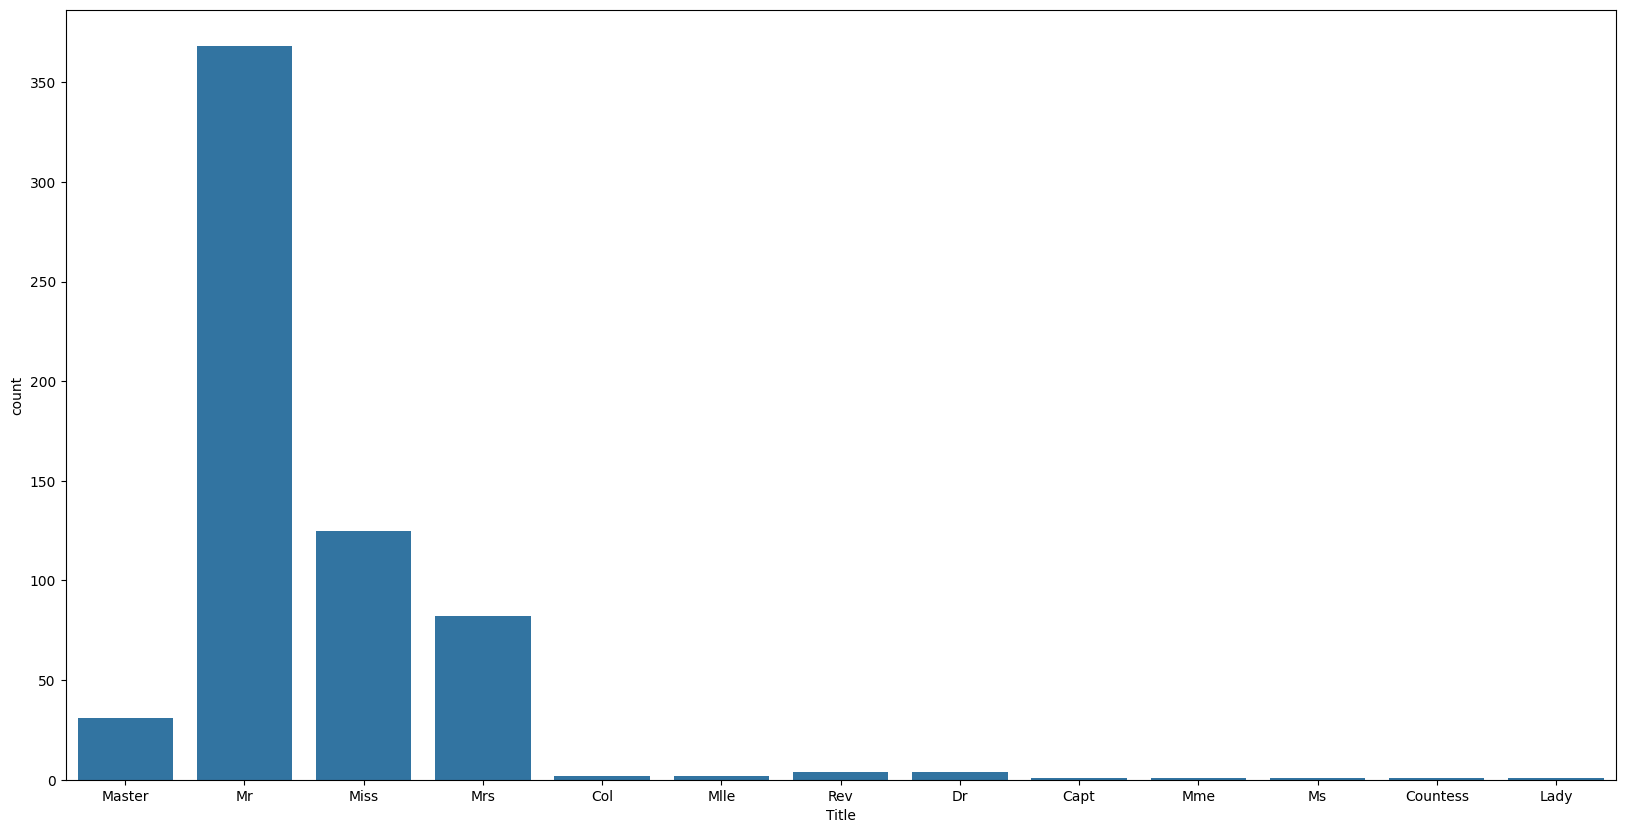

Title
Mr          149
Miss         57
Mrs          43
Master        9
Dr            3
Rev           2
Major         2
Don           1
Jonkheer      1
Sir           1
Name: count, dtype: int64


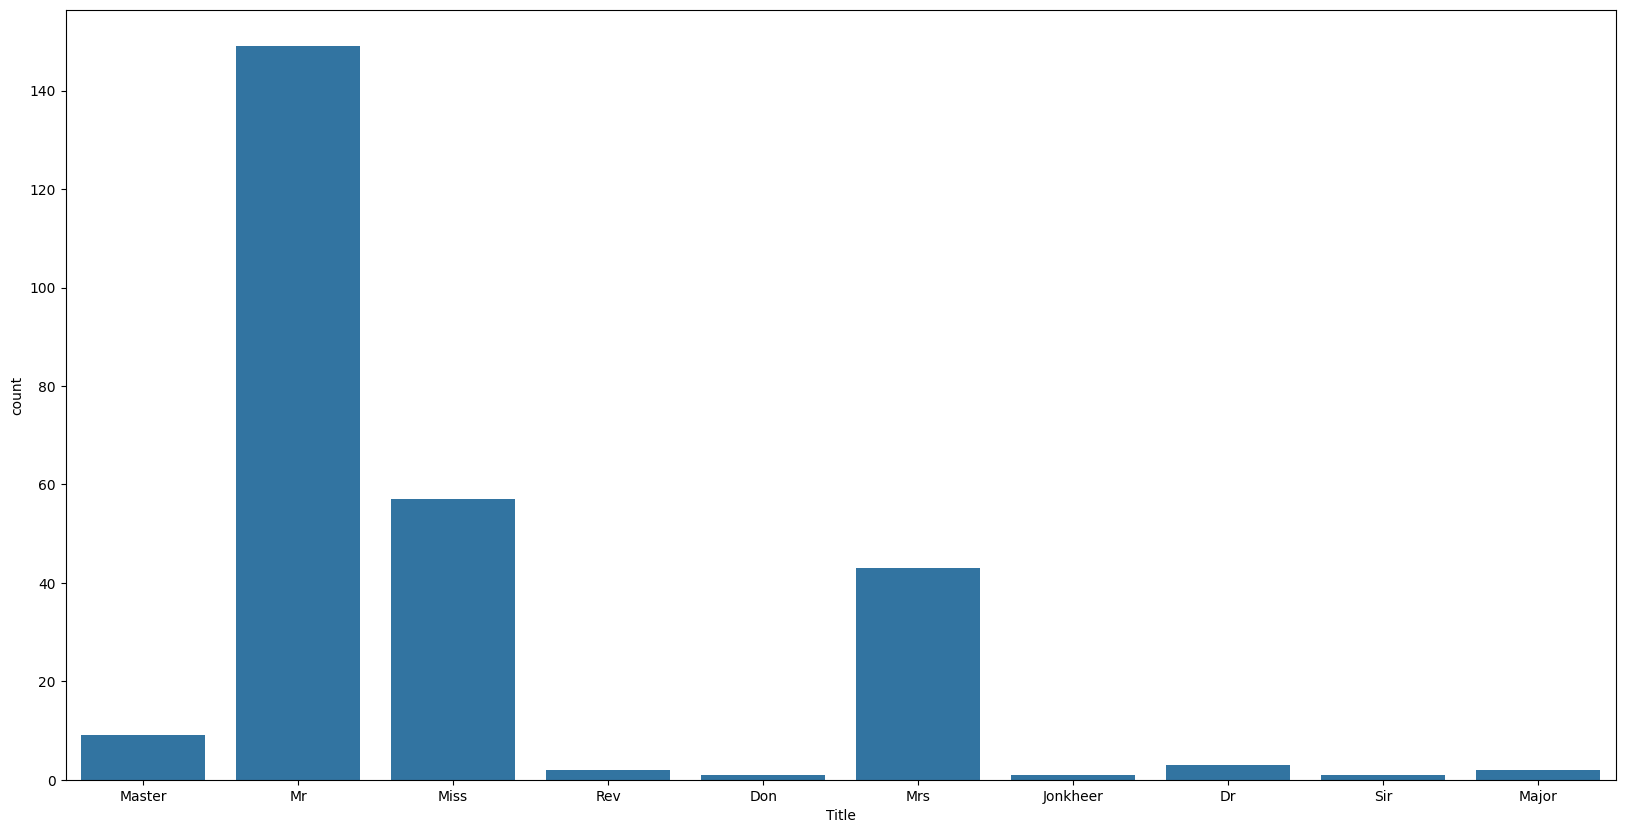

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


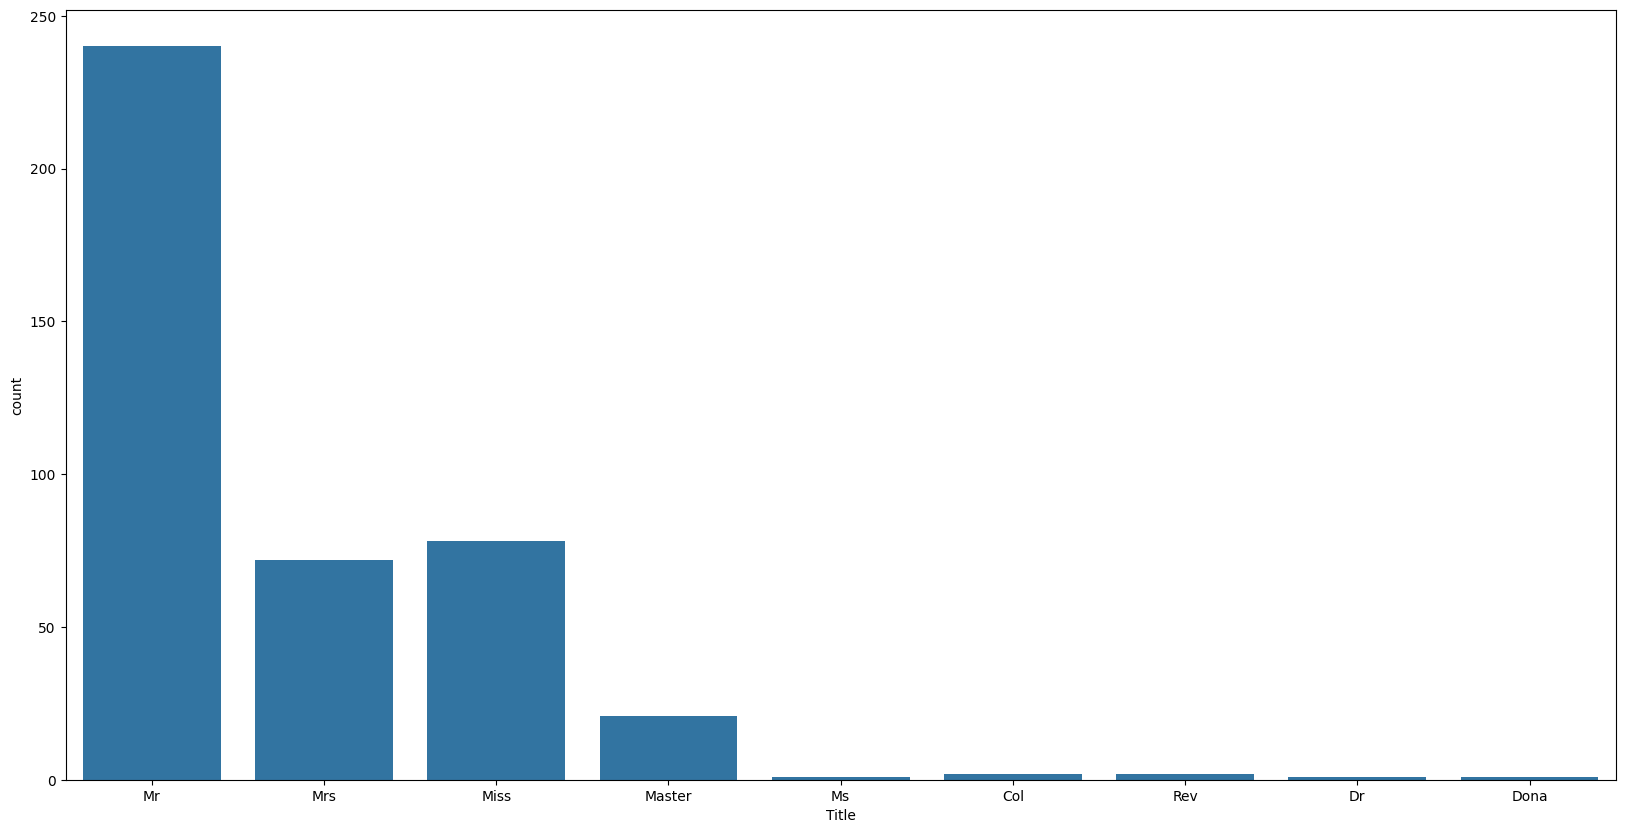

In [28]:
# Extract titles from the name feature training
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(train_data['Title'].value_counts())
titleFig = plt.figure(figsize=(20, 10))
ax = []
ax.append(sns.countplot(data=train_data, x=train_data['Title']))
plt.show()

# Extract titles from the name feature validation
val_data['Title'] = val_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(val_data['Title'].value_counts())
titleFig = plt.figure(figsize=(20, 10))
ax = []
ax.append(sns.countplot(data=val_data, x=val_data['Title']))
plt.show()

# Extract titles from the name feature test
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(test_data['Title'].value_counts())
titleFig = plt.figure(figsize=(20, 10))
ax = []
ax.append(sns.countplot(data=test_data, x=test_data['Title']))
plt.show()

Now that we have the name titles, we don't longer need the name column so we are going to remove it

In [29]:
# dropping Name column training
train_data = train_data.drop(columns=['Name'])

# dropping Name column validation
val_data = val_data.drop(columns=['Name'])

# droppin Name coolumn test
test_data = test_data.drop(columns=['Name'])

In [30]:
# let's check for each 
print(train_data.head())
print(val_data.head())
print(test_data.head())

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked   Title
445       1    male   4.000000      0      2  81.8583        S  Master
650       3    male  29.256353      0      0   7.8958        S      Mr
172       3  female   1.000000      1      1  11.1333        S    Miss
450       2    male  36.000000      1      2  27.7500        S      Mr
314       2    male  43.000000      1      1  26.2500        S      Mr
     Pclass     Sex        Age  SibSp  Parch     Fare Embarked   Title
709       3    male  29.256353      1      1  15.2458        C  Master
439       2    male  31.000000      0      0  10.5000        S      Mr
840       3    male  20.000000      0      0   7.9250        S      Mr
720       2  female   6.000000      0      1  33.0000        S    Miss
39        3  female  14.000000      1      0  11.2417        C    Miss
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title
0       3    male  34.5      0      0   7.8292        Q    Mr
1       3  female  47.0 

## Categorical Encoding

In [31]:
# extract cat cols
cat_cols = [cname for cname in train_data.columns if train_data[cname].dtype == "object"]
cat_cols_one_hot = cat_cols[0:2]
cat_cols_label_enc = cat_cols[2:]
print('OneHotEncoder processing columns: ', cat_cols_one_hot )
print('LabelEncoder processing column: ', cat_cols_label_enc )

OneHotEncoder processing columns:  ['Sex', 'Embarked']
LabelEncoder processing column:  ['Title']


### One-Hot Endoding

In [32]:
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')

# fit the encoder in the training data and then usit in other datasets
train_data_encoded = oneHotEncoder.fit_transform(train_data[cat_cols_one_hot])
val_data_encoded = oneHotEncoder.fit_transform(val_data[cat_cols_one_hot])
test_data_encoded = oneHotEncoder.transform(test_data[cat_cols_one_hot])

# convert encoded datasets to pandas dataframes
train_data_encoded_df = pd.DataFrame(train_data_encoded.toarray(), columns=oneHotEncoder.get_feature_names_out(cat_cols_one_hot))
val_data_encoded_df = pd.DataFrame(val_data_encoded.toarray(), columns=oneHotEncoder.get_feature_names_out(cat_cols_one_hot))
test_data_encoded_df = pd.DataFrame(test_data_encoded.toarray(), columns=oneHotEncoder.get_feature_names_out(cat_cols_one_hot))

# drop cat_cols from the original dataset
train_data = train_data.drop(columns=cat_cols_one_hot, axis=1)
val_data = val_data.drop(columns=cat_cols_one_hot, axis=1)
test_data = test_data.drop(columns=cat_cols_one_hot, axis=1)

# Concatenate original dataset with new encoded datasets
train_dataset_encoded = pd.concat([train_data.reset_index(drop=True), train_data_encoded_df], axis=1)
val_dataset_encoded = pd.concat([val_data.reset_index(drop=True), val_data_encoded_df], axis=1)
test_dataset_encoded = pd.concat([test_data.reset_index(drop=True), test_data_encoded_df], axis=1)

print(train_dataset_encoded.shape)
print(val_dataset_encoded.shape)
print(test_dataset_encoded.shape)

print('categorical data handled with one-hot-encoded')

(623, 12)
(268, 12)
(418, 12)
categorical data handled with one-hot-encoded


### Label Encoding

In [33]:
train_dataset_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,"Embarked_0 S\nName: Embarked, dtype: object",Embarked_C,Embarked_Q,Embarked_S
0,1,4.000000,0,2,81.8583,Master,0.0,1.0,0.0,0.0,0.0,1.0
1,3,29.256353,0,0,7.8958,Mr,0.0,1.0,0.0,0.0,0.0,1.0
2,3,1.000000,1,1,11.1333,Miss,1.0,0.0,0.0,0.0,0.0,1.0
3,2,36.000000,1,2,27.7500,Mr,0.0,1.0,0.0,0.0,0.0,1.0
4,2,43.000000,1,1,26.2500,Mr,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
labelEncoder = LabelEncoder()

# fit the encoder in the training data and then use it in other datasets
train_dataset_encoded['Title'] = labelEncoder.fit_transform(train_data['Title'])
val_dataset_encoded['Title'] = labelEncoder.fit_transform(val_data['Title'])
test_dataset_encoded['Title'] = labelEncoder.fit_transform(test_data['Title'])

print(train_dataset_encoded.shape)
print(val_dataset_encoded.shape)
print(test_dataset_encoded.shape)

print('categorical data handled with label encoding')


(623, 12)
(268, 12)
(418, 12)
categorical data handled with label encoding


In [35]:
train_dataset_encoded

,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,"Embarked_0 S\nName: Embarked, dtype: object",Embarked_C,Embarked_Q,Embarked_S
0,1,4.000000,0,2,81.8583,5,0.0,1.0,0.0,0.0,0.0,1.0
1,3,29.256353,0,0,7.8958,9,0.0,1.0,0.0,0.0,0.0,1.0
2,3,1.000000,1,1,11.1333,6,1.0,0.0,0.0,0.0,0.0,1.0
3,2,36.000000,1,2,27.7500,9,0.0,1.0,0.0,0.0,0.0,1.0
4,2,43.000000,1,1,26.2500,9,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
618,3,21.000000,0,0,7.6500,6,1.0,0.0,0.0,0.0,0.0,1.0
619,1,29.256353,0,0,31.0000,9,0.0,1.0,0.0,0.0,0.0,1.0
620,3,41.000000,2,0,14.1083,9,0.0,1.0,0.0,0.0,0.0,1.0
621,1,14.000000,1,2,120.0000,6,1.0,0.0,0.0,0.0,0.0,1.0


## Normalization

Normalization will be implemented in the `Training.ipynb` file

In [36]:
# initialized the scaler 
scaler = MinMaxScaler()

# normalize train data
train_data_scaled = scaler.fit_transform(train_dataset_encoded)
val_data_scaled = scaler.transform(val_dataset_encoded)
test_data_scaled = scaler.transform(test_dataset_encoded)

print(train_data_scaled.shape)
print(val_data_scaled.shape)
print(test_data_scaled.shape)

print('data normalized')

(623, 12)
(268, 12)
(418, 12)
data normalized


In [37]:
print(np.max(train_data_scaled))
print(np.min(train_data_scaled))

print(np.max(val_data_scaled))
print(np.min(val_data_scaled))

print(np.max(test_data_scaled))
print(np.min(test_data_scaled))

1.0
0.0
1.0
0.0
1.5
-0.00314149283739633


## Build and train the models

In [38]:
# logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(train_data_scaled, train_labels)

# random forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(train_data_scaled, train_labels)

# support vector classifier model
svm_model = SVC(kernel="linear")
svm_model.fit(train_data_scaled, train_labels)

# naive bayes multinomial classifier
nb_model = MultinomialNB()
nb_model.fit(train_data_scaled, train_labels)

# k-nearest neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_data_scaled, train_labels)

# Adaboost classifier
adaboost_base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(adaboost_base_classifier, n_estimators=50, random_state=42)
adaboost_model.fit(train_data_scaled, train_labels)

print('models set')

models set


## Make predictions

### Function to show the info about the predictions

In [39]:
def model_metrics(train_pred):
    accuracy = accuracy_score(val_labels, train_pred)
    confusion = confusion_matrix(val_labels, train_pred)
    report = classification_report(val_labels, train_pred)

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", report)
    
    return accuracy

### Generate predictions

In [40]:
val_preds_regression_model = logistic_regression_model.predict(val_data_scaled)
regression_model_accuracy = model_metrics(val_preds_regression_model)
print('train preds made for regression model')

val_preds_random_forest_model = random_forest_model.predict(val_data_scaled)
random_forest_model_accuracy = model_metrics(val_preds_random_forest_model)
print('train preds made for random forest model')

val_preds_svm_model = svm_model.predict(val_data_scaled)
svm_model_accuracy = model_metrics(val_preds_svm_model)
print('train preds made for svm model')

val_preds_nb_model = nb_model.predict(val_data_scaled)
nb_model_accuracy = model_metrics(val_preds_nb_model)
print('train preds made for nb model')

val_preds_knn_model = knn_model.predict(val_data_scaled)
knn_model_accuracy = model_metrics(val_preds_knn_model)
print('train preds for knn model')

val_preds_adaboost_model = adaboost_model.predict(val_data_scaled)
adaboost_model_accuracy = model_metrics(val_preds_adaboost_model)
print('train preds for adaboost model')

Accuracy: 0.7947761194029851
Confusion Matrix:
 [[132  25]
 [ 30  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

train preds made for regression model
Accuracy: 0.7798507462686567
Confusion Matrix:
 [[124  33]
 [ 26  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       157
           1       0.72      0.77      0.74       111

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268

train preds made for random forest model
Accuracy: 0.7910447761194029
Confusion Matrix:
 [[134  23]
 [ 33  78]]
Classi

## Submissions

In [41]:
# Submission prediction
preds = nb_model.predict(test_data_scaled)
print('train preds made')

# generate data frame for submision
submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": preds
})

print('submission set')

train preds made
submission set


In [42]:
# write the file to submission
submission.to_csv('./submissions/titanic_dissaster_submission_nb.csv', index=False, header=True)
print('submission file generated')

submission file generated


## Data Export

Export train data and test data for training and make predictions in the `Training.ipynb` file

#### Check everything is as expected

In [43]:
# train_labels_df = train_labels.to_frame(name='Survived')
# train_dataset_encoded = pd.concat([train_dataset_encoded, train_labels_df], axis=1)
# train_dataset_encoded

In [44]:
# test_dataset_encoded

### Exports

In [45]:
# # train_processed.csv
# train_dataset_encoded.to_csv('train_processed.csv', index=False, header=True)

# # test_processed.csv
# test_dataset_encoded.to_csv('test_processed.csv', index=False, header=True)